In [2]:
#We will load all the necessary libraries for this data analytics project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#producing a 3*3 array of random integer numbers between 0 to 9
rng=np.random.RandomState(100)
rng.randint(10, size=[3,3])

array([[8, 8, 3],
       [7, 7, 0],
       [4, 2, 5]])

In [3]:
#creating a dataframe with three columns for the purpose of data aggregation techniques

rng = np.random.RandomState(0)

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)})

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [5]:
#we can group each column based on a key column and later apply any function on those partioned groups and 
#aggregate the results. 

df['data1'].groupby(df['key']).aggregate(['min','median','max'])

#the key column can come from an independent dataframe. 


,min,median,max
key,,,
A,0,1.5,3
B,1,2.5,4
C,2,3.5,5


In [6]:
#we can apply the same aggregation methods on the whole dataframe as once. This will aggregate each column individually. 
df.groupby('key').aggregate(['min','median','max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [8]:
#we can also transform each data point in the dataframe by their respective group metric. 
#here we transform the each datapoint by centering each data point through their respective group mean
df.groupby('key').transform(lambda x:x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [2]:
#lets import the US state population datasets to introduce the JOIN functions.  
populations=pd.read_csv('Python datasets/state-population.csv')
areas=pd.read_csv('Python datasets/state-areas.csv')
abbrev=pd.read_csv('Python datasets/state-abbrevs.csv')

In [10]:
populations.head(5)

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [11]:
areas.head(5)

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [18]:
abbrev.head(5)

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [14]:
#the 'populations' dataframe contains population data from 1990-2012 for each state. 
populations['year'].unique()

array([2012, 2010, 2011, 2009, 2013, 2007, 2008, 2005, 2006, 2004, 2003,
       2001, 2002, 1999, 2000, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
       1991, 1990], dtype=int64)

In [16]:
print(populations.shape)
print(areas.shape)
print(abbrev.shape)

(2544, 4)
(52, 2)
(51, 2)


In [3]:
#the two matching columns in the "populations" and "abbrev" dataframes are the 'state/region' and 'abbreviation' columns
#we can join these two dataframes on those matching columns. First we wil do the full join (outer join). 
full_join=pd.merge(populations, abbrev, how='outer', left_on='state/region', right_on='abbreviation')
full_join.head(5)

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [4]:
#we will drop the redundant 'abbreviation' column
full_join.drop('abbreviation', axis=1, inplace=True)

In [22]:
full_join.head(5)

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [24]:
full_join.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [ ]:
#we can see the 'population' and 'state' columns have null values. 

In [25]:
#lets check out the null values
full_join[full_join['population'].isnull()].head(5)

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [26]:
full_join[full_join['state'].isnull()].head(5)

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [27]:
#lets check out which unique state/region have null values in the 'state' column
full_join.loc[full_join['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [5]:
#it is clear that there are no entries in the "state" column for the states 'PR' and 'USA'. We will define these states now.
full_join.loc[full_join['state/region']=='PR', 'state'] = 'Puerto Rico'
full_join.loc[full_join['state/region']=='USA', 'state'] = 'United States'

full_join['state'].isnull().any()

False

In [30]:
#so there is no more null values in the "state" column. 
full_join.loc[full_join['state/region']=='USA', : ].head(5)

,state/region,ages,year,population,state
2496,USA,under18,1990,64218512.0,United States
2497,USA,total,1990,249622814.0,United States
2498,USA,total,1991,252980942.0,United States
2499,USA,under18,1991,65313018.0,United States
2500,USA,under18,1992,66509177.0,United States


In [6]:
#unfortunately we can't join the 'areas' dataframe with the 'populations' dataframe because they don't have any matching columns
#but we can definitely join the 'areas' dataframe with the 'full_join' dataframe because we already have imported the 'state'
#column in the 'full_join' dataframe which has a matching column in the 'areas' dataframe. 

full_join=pd.merge(full_join, areas, on='state', how='left')

full_join.head(5)

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [32]:
full_join.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [7]:
#now we will filter only the 2010 data with total population
data_2010=full_join.query("ages=='total' & year==2010")

In [8]:
data_2010.head(5)

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [9]:
#as we can see the indexing is following the previous order. Here we set the "state" column as the index column.  
data_2010.set_index('state', inplace=True)
data_2010.head(5)

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [13]:
#lets add a new 'density' column in the original 'data_2010' dataframe
data_2010=data_2010.copy() #you need to copy the data. Otherwise it will show warnings when trying to create a new column
data_2010.loc[:, 'density'] = data_2010['population'] / data_2010['area (sq. mi)']
data_2010.head(5)

,state/region,ages,year,population,area (sq. mi),density
state,,,,,,
Alabama,AL,total,2010,4785570.0,52423.0,91.287603
Alaska,AK,total,2010,713868.0,656425.0,1.087509
Arizona,AZ,total,2010,6408790.0,114006.0,56.214497
Arkansas,AR,total,2010,2922280.0,53182.0,54.948667
California,CA,total,2010,37333601.0,163707.0,228.051342


In [14]:
#here we sort the dataframe in ascending order of density and select the lowest six. 
data_2010.loc[:, ['state/region', 'density']].sort_values(by='density', 
                                                  ascending=True).head(6)

,state/region,density
state,,
Alaska,AK,1.087509
Wyoming,WY,5.768079
Montana,MT,6.736171
North Dakota,ND,9.537565
South Dakota,SD,10.583512
New Mexico,NM,16.982737


In [ ]:
#More aggregation and Grouping methods with Planet Data

In [2]:
import seaborn as sns

In [3]:
planets=sns.load_dataset('planets')
planets.shape

(1035, 6)

In [3]:
planets.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
#methods used for discovering an exoplanet. 
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [10]:
#most of the exoplanets were discovered by the Radial Velocity and Transit method
planets['number'].groupby(planets['method']).sum()

method
Astrometry                         2
Eclipse Timing Variations         15
Imaging                           50
Microlensing                      27
Orbital Brightness Modulation      5
Pulsar Timing                     11
Pulsation Timing Variations        1
Radial Velocity                  952
Transit                          776
Transit Timing Variations          9
Name: number, dtype: int64

In [15]:
#here you can see the top five methods used for the discovery of exoplanets. 

planets['number'].groupby(planets['method']).sum().sort_values(ascending=False).head(5)

method
Radial Velocity              952
Transit                      776
Imaging                       50
Microlensing                  27
Eclipse Timing Variations     15
Name: number, dtype: int64

In [16]:
#the groupby object supports column indexing. So we can write the previous code as follows. 

planets.groupby('method')['number'].sum().sort_values(ascending=False).head(5)

method
Radial Velocity              952
Transit                      776
Imaging                       50
Microlensing                  27
Eclipse Timing Variations     15
Name: number, dtype: int64

In [7]:
#now we will count the total number of exoplanets discovered by each method but distributed in each decade. 
decade=10*(planets['year']//10)
len(decade)

1035

In [8]:
decade=decade.astype('str')+'s'
len(decade)

1035

In [9]:
planets.groupby(['method', decade])['number'].sum()
#here the total numbers are grouped by method then there is a decade subgroup for each method. 
#the decades are stacked in each method...lets unstack it... 

method                         year 
Astrometry                     2010s      2
Eclipse Timing Variations      2000s      5
                               2010s     10
Imaging                        2000s     29
                               2010s     21
Microlensing                   2000s     12
                               2010s     15
Orbital Brightness Modulation  2010s      5
Pulsar Timing                  1990s      9
                               2000s      1
                               2010s      1
Pulsation Timing Variations    2000s      1
Radial Velocity                1980s      1
                               1990s     52
                               2000s    475
                               2010s    424
Transit                        2000s     64
                               2010s    712
Transit Timing Variations      2010s      9
Name: number, dtype: int64

In [10]:
#we see a lots of NA values for which there were no exoplanet discovered in that decade by that method. 
planets.groupby(['method', decade])['number'].sum().unstack()

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [11]:
#we can fill the NA values with zero. 
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [ ]:
#Pivot tables

In [2]:
#lets load the the titanic dataset from seaborn library
titanic=sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#look at the survival rate between male and female. The survival rate is much higher for female than male. 
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [7]:
#now if we want to know the survival rate of female and male in each passenger class then we might do the following. 
titanic.groupby(['sex','class'])[['survived']].mean().unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [8]:
#but there is a nice and neat method using the pivot tables to do the same. It is evident that almost all of the women in the
#first class survived. We can call this grouping method as two dimensional.  
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [9]:
#if we want we also introduce a third dimension. Here we employ 'age' as the third dimension. 
age = pd.cut(titanic['age'], [0, 18, 80]) #creating two age groups of 0-18 and 18-80 years old. 

In [11]:
age.head()

0    (18, 80]
1    (18, 80]
2    (18, 80]
3    (18, 80]
4    (18, 80]
Name: age, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [13]:
#we find the survival rate of male and female in each class and also the survival rate in the age category for each genger. We
#see the survival rate of female in the first class and 18-80 age category is the highest. 
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [14]:
fare= pd.qcut(titanic['fare'], 2)

In [15]:
fare.head()

0     (-0.001, 14.454]
1    (14.454, 512.329]
2     (-0.001, 14.454]
3    (14.454, 512.329]
4     (-0.001, 14.454]
Name: fare, dtype: category
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [2]:
#USA birth data
births=pd.read_csv('Python datasets/Births.csv')

In [3]:
#this birth dataset contains the number of births each day from the year 1969 to 2008 for male and female in USA.  
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
len(births['year'].unique())

40

In [7]:
#lets look at the total number of births for male and female in each decade. You must provide the aggregate function 'sum' as
#argument. We can see the male numbers are higher than the female numbers throughout the decades. 
decade = 10*(births['year']//10)
births.pivot_table('births', index=decade, columns='gender', aggfunc='sum')

gender,F,M
year,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [11]:
#we can plot this aggregated data using the built-in plot function in pandas. But this time we will aggregate the yearly data
#instead of decade
import matplotlib.pyplot as plt
sns.set() #plotting will use the seaborn styles

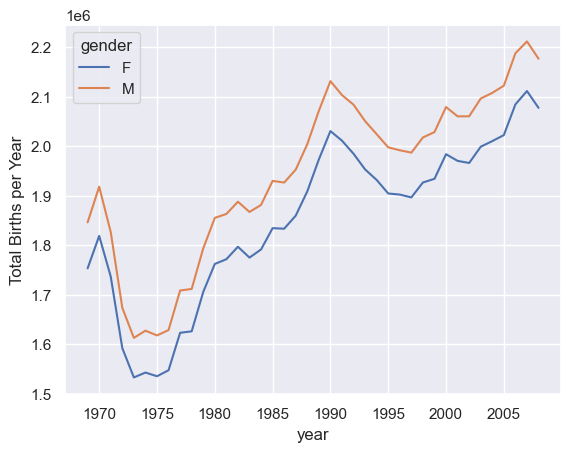

In [14]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('Total Births per Year')

In [ ]:
#string operations on series and data frame

In [5]:
#pandas vectorizes the string operation. So that the function applies on all the elements of a series or the data frame 
names=pd.Series(['sakhawat','hossen', 'sunny', 'fahmida', 'fahmi', 'charm', 'quark'])
names

0    sakhawat
1      hossen
2       sunny
3     fahmida
4       fahmi
5       charm
6       quark
dtype: object

In [6]:
#capitalize all letters
names.str.upper()

0    SAKHAWAT
1      HOSSEN
2       SUNNY
3     FAHMIDA
4       FAHMI
5       CHARM
6       QUARK
dtype: object

In [7]:
#length of each string
names.str.len()

0    8
1    6
2    5
3    7
4    5
5    5
6    5
dtype: int64

In [8]:
#names that starts with 'f'. Outputs booleans
names.str.startswith('f')

0    False
1    False
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [9]:
names[names.str.startswith('f')]

3    fahmida
4      fahmi
dtype: object